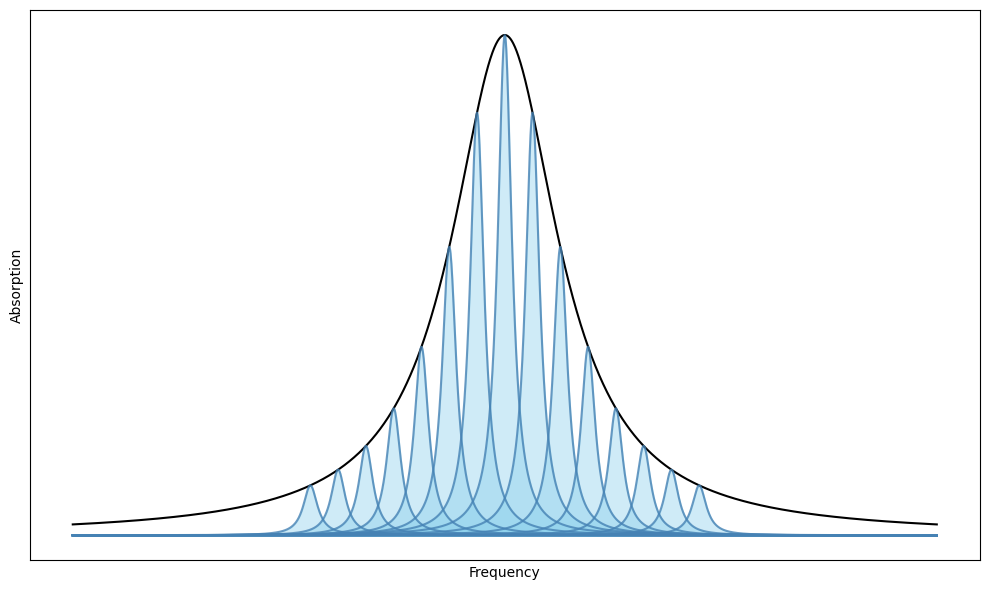

Figure saved as /Users/fergusayton/Documents/My Library/fayt3249/2024/Honours Thesis/Thesis Figures and Diagrams/Figures/MyResults/inhom_broad_lorentzian_envelope.png


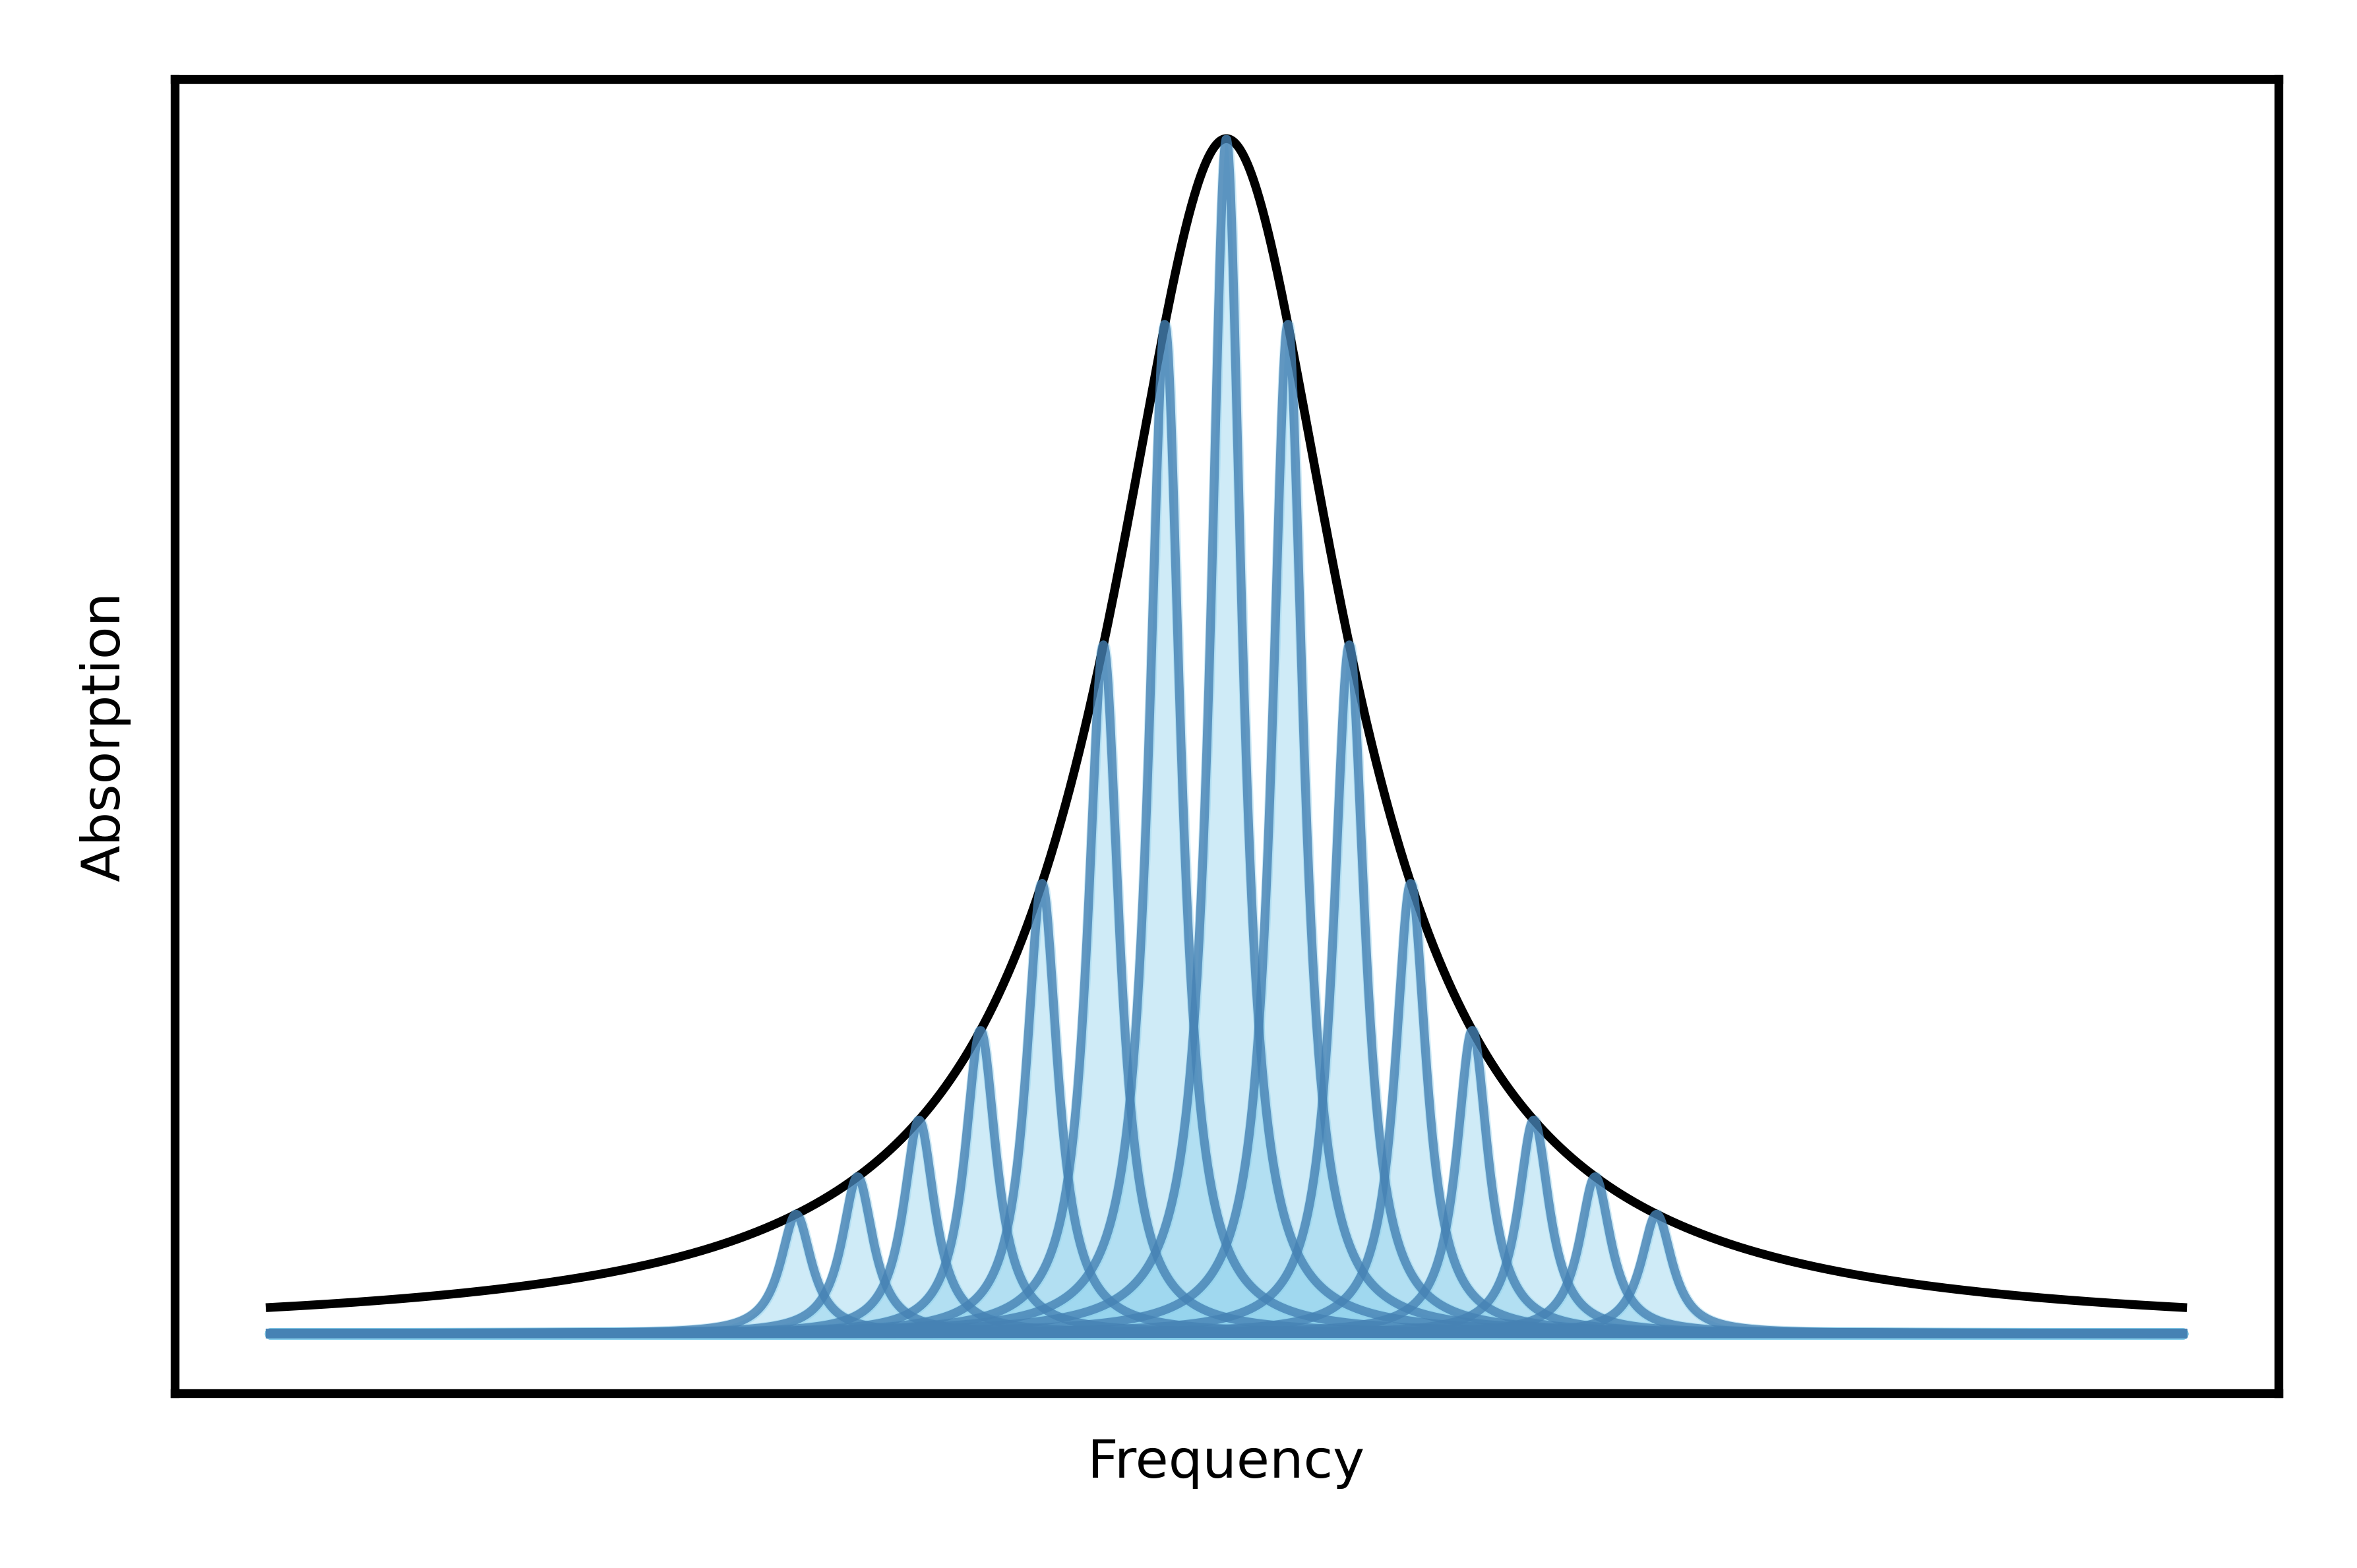

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import my_functions as mf
import importlib
importlib.reload(mf)

# Frequency axis
freq = np.linspace(-10, 10, 2000)

# Lorentzian function (used both as envelope and peak shape)
def lorentz(x, x0, gamma):
    return (gamma / 2)**2 / ((x - x0)**2 + (gamma / 2)**2)

# Parameters
n_spins = 15
spin_positions = np.linspace(-4.5, 4.5, n_spins)
gamma_hom = 0.4           # homogeneous broadening (individual spins)
gamma_inhom = 3.0         # inhomogeneous envelope width

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6))

# Lorentzian envelope (inhomogeneous shape)
envelope = lorentz(freq, 0, gamma_inhom)
ax.plot(freq, envelope, 'k', label="Inhomogeneous Envelope (Lorentzian)")

# Plot each Lorentzian individually, scaled by envelope at its center
for pos in spin_positions:
    amp = lorentz(pos, 0, gamma_inhom)  # Amplitude from Lorentzian envelope
    lorentz_peak = amp * lorentz(freq, pos, gamma_hom)
    ax.plot(freq, lorentz_peak, color='steelblue', alpha=0.8)
    ax.fill_between(freq, lorentz_peak, color='skyblue', alpha=0.4)


ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(axis='both', which='both', length=0)
# Labels and formatting
ax.set_xlabel("Frequency")
ax.set_ylabel("Absorption")
fig.tight_layout()
plt.show()

mf.apply_fig_style(fig, ax, "small", line_size=0.8, marker_size=4)
mf.save_figure(fig, "inhom_broad_lorentzian_envelope",
               "/Users/fergusayton/Documents/My Library/fayt3249/2024/Honours Thesis/Thesis Figures and Diagrams/Figures/MyResults")
fig
